In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:0.1% !important;height:0.1% !important;</style>"
HTML( style )

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\graphviz2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\graphviz2.38"


In [3]:
titanic_data = pd.read_csv('titanic/train.csv')
titanic_data.head()
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket'], axis=1)
y = titanic_data.Survived

In [37]:
X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
X = pd.get_dummies(X) # избавление от строковых значений
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [6]:
max_depth_values = range(1, 100)

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
scores_data = pd.DataFrame()

In [9]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

In [10]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [13]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                var_name='set_type', value_name='score')

In [14]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

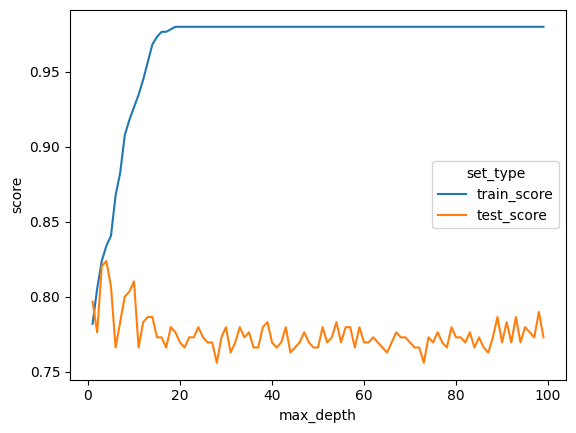

In [15]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [16]:
from sklearn.model_selection import cross_val_score

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [22]:
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

In [25]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                var_name='set_type', value_name='score')

In [26]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

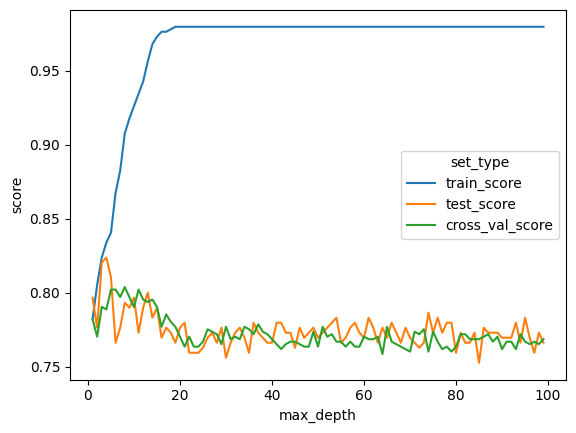

In [27]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [29]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.802073
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.803725
206,9,cross_val_score,0.796989
207,10,cross_val_score,0.790266


In [30]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [31]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7966101694915254

## Тренировка на ирисах

### 1. Подключаем необходимые библиотеки:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [26]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 
from IPython.display import HTML
from sklearn import tree

style = "<style>svg{width:50% !important;height:30% !important;}</style>"
HTML(style)

### 2. Подготовка данных

In [38]:
# Считываем базы
df_train = pd.read_csv('train_iris.csv', index_col=0)
df_test = pd.read_csv("test_iris.csv", index_col=0)

#Удаляем ненужные столбцы и тот, который будем предсказывать:
X_train = df_train.drop(['species'], axis=1)
X_test = df_test.drop(['species'], axis=1)

#Создаем переменную, которую предсказываем:
y_train = df_train.species
y_test = df_test.species

In [40]:
X_train.head()

,sepal length,sepal width,petal length,petal width
130,7.4,2.8,6.1,1.9
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2
142,5.8,2.7,5.1,1.9
109,7.2,3.6,6.1,2.5


### 3. Обучение

In [41]:
# Добавляем согласно условию:
rs = np.random.seed(0)

#Определяем новую базу:
score_data = pd.DataFrame()

#Определяем переменную max_depth_values:
max_depth_values = range(1, 100)

#пишем цикл для поиска оптимальной глубины и сохраняем полученные данные в новую базу:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

In [47]:
scores_data 

,max_depth,train_score,test_score,cross_val_score
0,1,0.716418,0.666667,0.716484
0,2,1.000000,0.969697,0.985714
0,3,1.000000,0.969697,0.985714
0,4,1.000000,1.000000,1.000000
0,5,1.000000,1.000000,1.000000
...,...,...,...,...
0,95,1.000000,0.920000,0.960000
0,96,1.000000,0.920000,0.960000
0,97,1.000000,0.920000,0.960000
0,98,1.000000,0.940000,0.960000


In [48]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score',],
                var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.716418
1,2,train_score,1.000000
2,3,train_score,1.000000
3,4,train_score,1.000000
4,5,train_score,1.000000


<Axes: xlabel='max_depth', ylabel='score'>

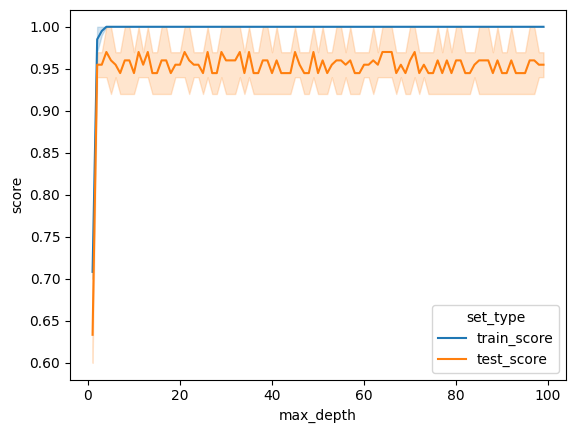

In [50]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

## Решение

In [56]:
# Импортируем специализированные модули Pandas и Numpy, не являющиеся частью стандартной библиотеки Python.
import pandas as pd
import numpy as np

# а также импортируем модули Seaborn, Matplotlib и Pydotplus для работы с графикой.
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

# Импортируем модуль tree из библиотеки sklearn для реализации алгоритмов решающих деревьев.
from sklearn import tree

# Импортируем модули, необходимые для визуализации дерева решений.
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

# Прописываем пути до graphviz.
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz2.38\bin" \
                      + os.pathsep + "C:\Program Files (x86)\Graphviz2.38"

# Устанавливаем размер области для построения графиков.
sns.set(rc={'figure.figsize': (9, 6)})

# Считываем тренировочный файл.
train_iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
# Считываем тестовый файл.
test_iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

# Отбросим колонки, не несущие важной информации для построения дерева решений.
# Отбрасываем не только предсказываемую species, но и первую колонку, так как она содержит id каждого экземпляра (цветка), а он для построения графика не нужен.
X_train_iris = train_iris_data.drop(['Unnamed: 0', 'species'], axis=1)
X_test_iris = test_iris_data.drop(['Unnamed: 0', 'species'], axis=1)

# Создадим переменные, которые будем предсказывать.
y_train_iris = train_iris_data.species
y_test_iris = test_iris_data.species

# Подберем оптимальное значение глубины обучения дерева.
# Зададим диапазон исследуемых значений.
max_iris_depth_values = range(1, 100)

# Обнулим DataFrame.
scores_iris_data = pd.DataFrame()

#  Задаем random seed.
rs = np.random.seed(0)

for max_iris_depth in max_iris_depth_values:
    # Изменяем глубину обучения дерева по циклу от 1 до 99 с шагом 1.
    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_iris_depth, random_state=rs)
    # Обучаем дерево решений (с ограниченной глубиной) на подмножестве train.
    clf_iris.fit(X_train_iris, y_train_iris)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество train)
    train_iris_score = clf_iris.score(X_train_iris, y_train_iris)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество test)
    test_iris_score = clf_iris.score(X_test_iris, y_test_iris)
    # Создаем временный DataFrame.
    temp_score_iris_data = pd.DataFrame({'max_iris_depth':[max_iris_depth],
                                         'train_iris_score':[train_iris_score],
                                         'test_iris_score':[test_iris_score]})
    # Наращиваем DataFrame "scores_iris_data".
    scores_iris_data = scores_iris_data.append(temp_score_iris_data)

# Видоизменим DataFrame, применив метод melt().
scores_iris_data_long = pd.melt(scores_iris_data, id_vars=['max_iris_depth'],
                           value_vars=['train_iris_score','test_iris_score'],
                           var_name='set_type', value_name='score')

# Визуализация.
sns.lineplot(x='max_iris_depth', y='score', hue='set_type', data=scores_iris_data_long)

# Отображение графиков Matplotlib и Seaborn в PyCharm.
plt.show()

HTTPError: HTTP Error 502: Bad Gateway

### Тренировка на котиках и собачках